# Programming Exercise 1: Linear Regression

선형회귀를 사이킷 런으로 해결해본다.





In [1]:
import os
import numpy as np
import pandas as pd
# Plotting library
from matplotlib import pyplot as plt


## 1 Scikit Learn use.

https://www.kaggle.com/competitions/bike-sharing-demand/overview

https://www.kaggle.com/competitions/bike-sharing-demand/data


In [2]:
# 깃 허브에 있는 자료를 다운 받아서 코랩의 디렉토리에 임시로 저장한다.
import os
from six.moves import urllib

for fn_dst in ['train.csv', 'test.csv']:
    fn_src = 'https://raw.githubusercontent.com/suakii/1stgradeCS/main/ex1/data/bike/%s' % fn_dst

    if os.path.isfile(fn_dst):
        print('File %s is already downloaded' % fn_dst)
    else:
        print('Downloaded %s' % fn_dst)
        urllib.request.urlretrieve(fn_src, fn_dst)


Downloaded train.csv
Downloaded test.csv


## 2 Linear regression with one variable


데이터 불러오기


In [3]:
# Read comma separated data
train = pd.read_csv('train.csv')

print(type(train))
print(train.shape)
df = train.copy()


<class 'pandas.core.frame.DataFrame'>
(10886, 12)


In [4]:
# Pandas로 읽어온 데이터의 5행을 읽어서 출력한다.
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
#df.info() 함수를 통하여 각 컬럼의 정보를 확인할 수 있다.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
# 데이터프레임 전체 열 이름 조회
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
df['datetime']=pd.to_datetime(df['datetime'])       #int 형식에서 날짜 형식으로 변경
df['day']=df['datetime'].map(lambda x:x.day)        #날짜 형식에서 day추출
df['month']=df['datetime'].map(lambda x:x.month)    #날짜 형식에서 month추출
df['year']=df['datetime'].map(lambda x:x.year)      #날짜 형식에서 year추출
df['hour']=df['datetime'].map(lambda x:x.hour)      #날짜 형식에서 hour추출


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  day         10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  year        10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [9]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,2011,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2011,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,2011,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,2011,4


### 2.1 Plotting the Data


(10886, 1)
(10886, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


Text(0.5, 1.0, 'Scatter plot for temp')

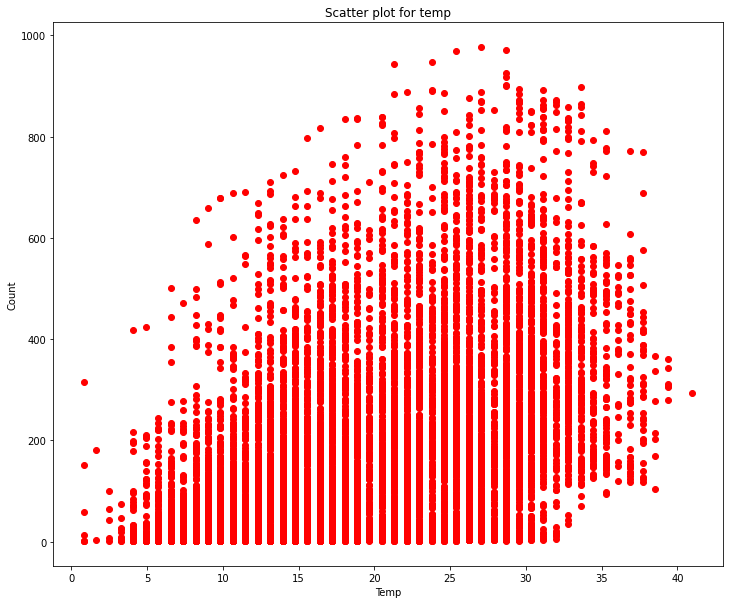

In [10]:
x = df[['temp']]
y = df[['count']]

print(x.shape)
print(y.shape)
print(type(x))
print(type(y))
fig, axes = plt.subplots(figsize=(12,10))
#axes.plot(x, y, 'r')
axes.scatter(x, y, c='r')
axes.set_xlabel('Temp')
axes.set_ylabel('Count')
axes.set_title('Scatter plot for temp')

In [11]:
# 사이킷런을 이용한 선형 모델을 정의한다.

from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x, y)

LinearRegression()

In [12]:
print(regr.score(x, y)) # 결정계수 점수(학습된 선형 회귀 모델은 Count를 Temp에 의해 15% 설명된다고 해석할 수 있다)
print(regr.intercept_)  #절편
print(regr.coef_)       #기울기

0.15559367802794855
[6.04621296]
[[9.17054048]]


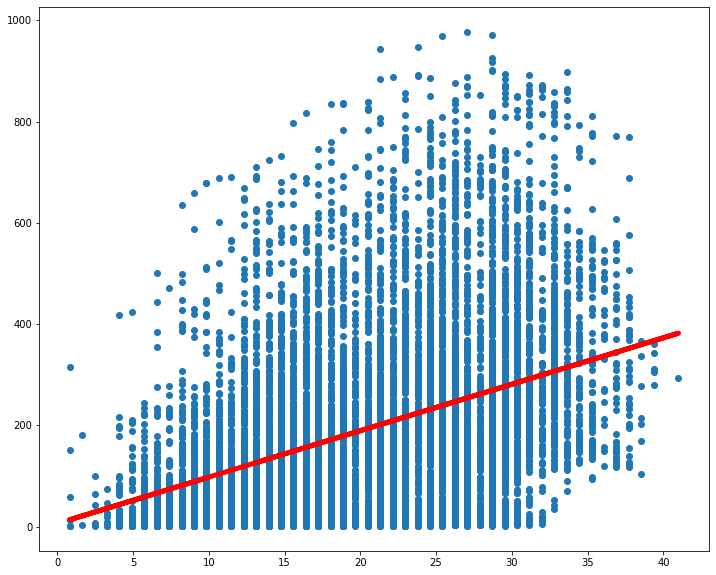

In [13]:
#온도를 가지고 예측한 값의 그래프를 그려보자.
fig, axes = plt.subplots(figsize=(12,10))
y_pred = regr.predict(x) # 온도 데이터를 선형회귀 모델에 입력 후 예측 값을 추출한다
axes.scatter(x, y)
axes.plot(x, y_pred, 'r-', linewidth=5)

In [14]:
from sklearn.metrics import mean_squared_error
print(y_pred.shape)
print(y.shape)
mean_squared_error(y, y_pred)

(10886, 1)
(10886, 1)


27705.2238053288

### 2.2 Linear Regression with Multiple features

이번에는 온도와 대여량이 아닌 조금 더 많은 요소를 넣어서 검증을 해보자.


In [15]:
feature_cols = ['temp', 'season', 'weather', 'humidity']
x_new = df[feature_cols]
y_new = df[['count']]
x_new.head()

,temp,season,weather,humidity
0,9.84,1,1,81
1,9.02,1,1,80
2,9.02,1,1,80
3,9.84,1,1,75
4,9.84,1,1,75


In [16]:
regr_new = LinearRegression()
regr_new.fit(x_new, y_new)
y_pred_new = regr_new.predict(x_new)
print(regr_new.intercept_)
print(regr_new.coef_)

[159.52068786]
[[ 7.86482499 22.53875753  6.67030204 -3.11887338]]


In [17]:
mean_squared_error(y_new, y_pred_new)

24335.477977461036

In [21]:
#전처리 추가 - 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[feature_cols])
df[feature_cols] = scaler.transform(df[feature_cols])
x_new_scale = df[feature_cols]
x_new_scale.head()

,temp,season,weather,humidity
0,-1.333661,-1.349864,-0.660178,0.993213
1,-1.438907,-1.349864,-0.660178,0.941249
2,-1.438907,-1.349864,-0.660178,0.941249
3,-1.333661,-1.349864,-0.660178,0.681430
4,-1.333661,-1.349864,-0.660178,0.681430


In [22]:
regr_new_scale = LinearRegression()
regr_new_scale.fit(x_new_scale, y_new)
y_pred_new = regr_new_scale.predict(x_new_scale)
print(regr_new_scale.intercept_)
print(regr_new_scale.coef_)

[191.57413191]
[[ 61.27667587  25.15602661   4.22770062 -60.02006509]]


In [23]:
mean_squared_error(y_new, y_pred_new)

24335.477977461032

## 3 신경망
이번에는 신경망을 통해서 이 작업을 수행해 본다.


In [ ]:
#simple regression model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


def build_model():
  model = keras.Sequential([
        layers.Dense(1, input_shape=(1,), name='simple')
      ])

  model.compile(loss='mse', optimizer='adam')
  return model


model = build_model()

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple (Dense)              (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x, y, epochs = 30, batch_size=10)

Epoch 1/30
1089/1089 [==============================] - 2s 1ms/step - loss: 60316.1953
Epoch 2/30
1089/1089 [==============================] - 1s 1ms/step - loss: 52910.6523
Epoch 3/30
1089/1089 [==============================] - 1s 1ms/step - loss: 46773.6133
Epoch 4/30
1089/1089 [==============================] - 1s 1ms/step - loss: 41665.3750
Epoch 5/30
1089/1089 [==============================] - 1s 1ms/step - loss: 37578.5820
Epoch 6/30
1089/1089 [==============================] - 1s 1ms/step - loss: 34388.6680
Epoch 7/30
1089/1089 [==============================] - 1s 1ms/step - loss: 31974.2734
Epoch 8/30
1089/1089 [==============================] - 1s 1ms/step - loss: 30252.9668
Epoch 9/30
1089/1089 [==============================] - 1s 1ms/step - loss: 29135.9785
Epoch 10/30
1089/1089 [==============================] - 1s 1ms/step - loss: 28459.4648
Epoch 11/30
1089/1089 [==============================] - 1s 1ms/step - loss: 28076.2461
Epoch 12/30
1089/1089 [==================

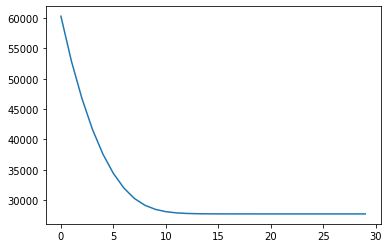

In [ ]:
plt.plot(np.arange(30), history.history['loss'])

In [ ]:
pred_ann = model.predict(x)

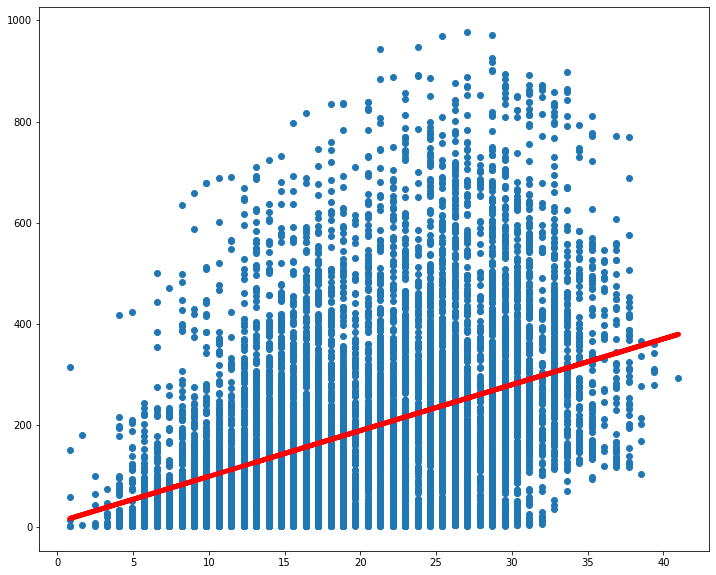

In [ ]:
fig, axes = plt.subplots(figsize=(12,10))

axes.scatter(x, y)
axes.plot(x, pred_ann, 'r-', linewidth=5)

In [ ]:
def build_model2():
  model = keras.Sequential([
        layers.Dense(1, input_shape=(4,), name='multi')
      ])

  model.compile(loss='mse', optimizer='adam')
  return model


model2 = build_model2()

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 multi (Dense)               (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(x_new, y_new, epochs = 30, batch_size=10)

Epoch 1/30
1089/1089 [==============================] - 2s 1ms/step - loss: 46424.9258
Epoch 2/30
1089/1089 [==============================] - 1s 1ms/step - loss: 39666.4336
Epoch 3/30
1089/1089 [==============================] - 1s 1ms/step - loss: 37750.2852
Epoch 4/30
1089/1089 [==============================] - 1s 1ms/step - loss: 36623.2109
Epoch 5/30
1089/1089 [==============================] - 1s 1ms/step - loss: 35570.7891
Epoch 6/30
1089/1089 [==============================] - 2s 2ms/step - loss: 34571.7773
Epoch 7/30
1089/1089 [==============================] - 2s 2ms/step - loss: 33656.7891
Epoch 8/30
1089/1089 [==============================] - 1s 1ms/step - loss: 32833.2539
Epoch 9/30
1089/1089 [==============================] - 1s 1ms/step - loss: 32073.0781
Epoch 10/30
1089/1089 [==============================] - 1s 1ms/step - loss: 31377.2168
Epoch 11/30
1089/1089 [==============================] - 1s 1ms/step - loss: 30752.3066
Epoch 12/30
1089/1089 [==================

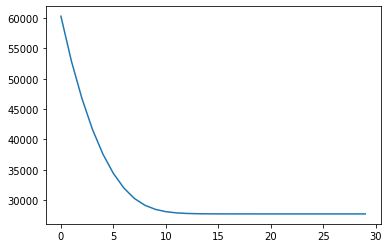

In [ ]:
plt.plot(np.arange(30), history.history['loss'])